# Приоритизация гипотез и анализ изменения выручки интернет-магазина по результатам А/В-теста.

# Описание проекта

Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

__Описание данных__<br>
*В нашем распоряжении три датасета.*

___Данные для первой части___

__Файл__ `/datasets/hypothesis.csv`
<br>`Hypothesis` — краткое описание гипотезы;
<br>`Reach` — охват пользователей по 10-балльной шкале;
<br>`Impact` — влияние на пользователей по 10-балльной шкале;
<br>`Confidence` — уверенность в гипотезе по 10-балльной шкале;
<br>`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

___Данные для второй части___

__Файл__ `/datasets/orders.csv`
<br>`transactionId` — идентификатор заказа;
<br>`visitorId` — идентификатор пользователя, совершившего заказ;
<br>`date` — дата, когда был совершён заказ;
<br>`revenue` — выручка заказа;
<br>`group` — группа A/B-теста, в которую попал заказ.

__Файл__ `/datasets/visitors.csv`
<br>`date` — дата;
<br>`group` — группа A/B-теста;
<br>`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## 1 часть. Приоритизация гипотез.

Импортируем библиотеки и загрузим данные для первой части из CSV-файла в переменную. Далее изучим данные и выполним предобработку, если это потребуется.

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# читаем файл
data = pd.read_csv('')

# посмотрим на содержимое таблицы и общую информацию
pd.set_option('display.max_colwidth', None)
display(data)
data.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

### Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [4]:
data['ice'] = (data['impact']*data['confidence'])/data['efforts']
data.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наиболее перспенктивные гипотезы по ICE с индексами: 8, 0, 7. 

### Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [5]:
data['rice'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
data = data.sort_values(by='rice', ascending=False)
data

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Наиболее перспенктивные гипотезы по RICE с индексами: 7, 2, 0, 6. 

### Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

Для этого построим график приоритезации гипотез для наглядности. Добавим 2 колонки с рейтингами RICE и ICE

In [6]:
data['rating_ice'] = data['ice'].rank()
data['rating_rice'] = data['rice'].rank(method='first')
data

,hypothesis,reach,impact,confidence,efforts,ice,rice,rating_ice,rating_rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0,7.0,9.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0,5.0,8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0,8.0,6.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0,6.0,7.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2,9.0,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0,2.0,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0,4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0,3.0,3.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0,1.0,1.0


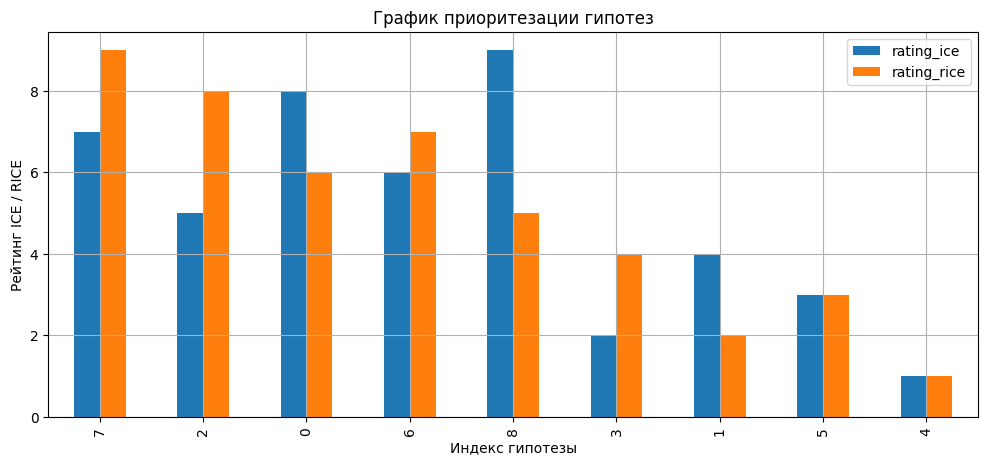

In [7]:
data[['hypothesis', 'rating_ice', 'rating_rice']].plot(kind = 'bar', grid=True, figsize=(12, 5))
plt.title("График приоритезации гипотез")
plt.xlabel("Индекс гипотезы")
plt.ylabel("Рейтинг ICE / RICE")
plt.show();

При сравнении RICE с ICЕ будем отталкиваться от *Reach* (параметр, учитывающий скольких пользователей затронет изменение).
Здесь в лидеры выбивается гипотеза с индексом 7 (гипотеза - **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**), т.к. *Reach* у нее 10, в то время как у других гипотез он меньше. На втором месте гипотеза с индексом 2 (гипотеза - **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**), у нее также высокий параметр *Reach* равный 8 и небольшие затраты (*Efforts* равен 3). Гипотеза с индексом 8 (гипотеза - **Запустить акцию, дающую скидку на товар в день рождения**) имеет самый высокий рейтинг ICЕ, но ее *Reach* составляет всего лишь 1 и в рейтинге RICE всего лишь на 5-ом месте.

## 2 часть. Анализ A/B-теста

### Построим график кумулятивной выручки по группам. 

Прочтём данные из файлов для второй части с результатами A/B-тестирования. Далее изучим данные и выполним предобработку, если это потребуется.

In [8]:
# читаем файл
orders = pd.read_csv('')

# посмотрим на содержимое таблицы, общую информацию и проверим на дубликаты
display(orders.head())
display(orders.info())
print('Количество дубликатов:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Количество дубликатов: 0


In [9]:
# читаем файл
visitors = pd.read_csv('')

# посмотрим на содержимое таблицы и общую информацию
display(visitors.head())
display(visitors.info())
print('Количество дубликатов:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Количество дубликатов: 0


In [10]:
# приведем колонки с датами в таблицах к нужному типу
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим, попадают ли какие-то пользователи в обе группы в таблице с заказами?

In [11]:
group_ab = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')
display(group_ab.head(3))
print('Общее количество пользователей в', group_ab.query('group != 0').count())
print('Количество пользователей, которые попали в обе', group_ab.query('group > 1').count())

,group
visitorId,
5114589,1
6958315,1
8300375,2


Общее количество пользователей в group    1031
dtype: int64
Количество пользователей, которые попали в обе group    58
dtype: int64


Всего 58 пользователей попали в обе группы. Их количество мало, удалять не будем, на анализ не повлияет.

Чтобы построить графики, соберем кумулятивные данные. 
<br>Для этого объявим датафрейм `cumulativeData` со столбцами: 
<br>`date` — дата;
<br>`group` — группа A/B-теста (A или B);
<br>`orders` — кумулятивное количество заказов на указанную дату в указанной группе;
<br>`buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
<br>`revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
<br>`visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем на экран несколько строк таблицы
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

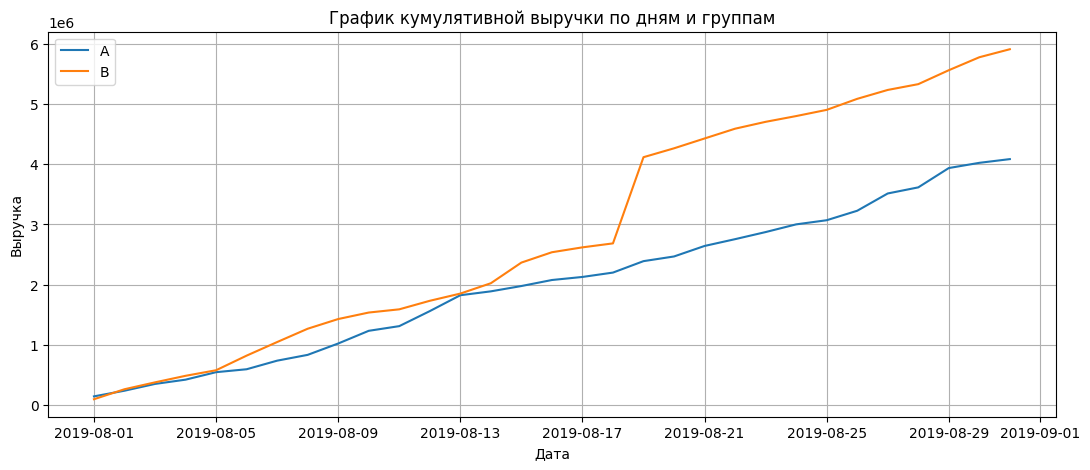

In [13]:
# получаем датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки групп А и В
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("График кумулятивной выручки по дням и группам")
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.legend();

Видим, что выручки обоих групп на протяжении всего теста растут. На старте выручка по группам практически одинаковая. После 05.08.2019 выручка в группе В начинает лидировать на всем промежутке теста, за исключением 13.08.2019, когда они пересекаются. Также видим всплеск 19.08.2019 в группе В, после чего данная группа становится абсолютным лидером до завершения теста. Это может сигнализировать о большом количестве заказов, либо о появлении очень дорогих заказов в выборке. 

### Построим график кумулятивного среднего чека по группам. 
<br> Для этого разделим кумулятивную выручку на кумулятивное число заказов.

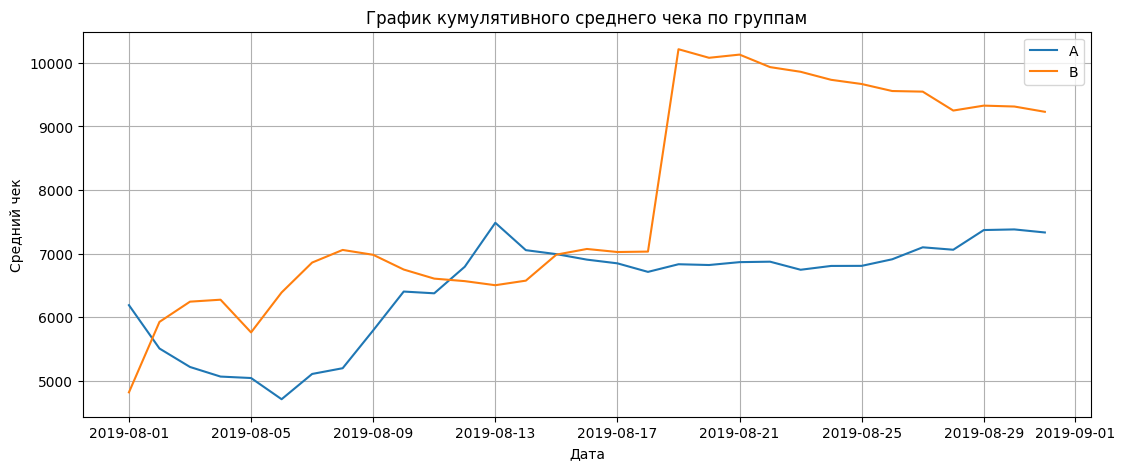

In [14]:
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.grid()
plt.legend();

Средний чек группы А становится равномерным ближе к концу теста. В начале месяца он падает, затем растет и далее более менее стабилизируется, достигает пика 13.08.2019, когда он выше, чем у группы В.
<br>У группы В средний чек волнообразный. Имеет огромный скачек 19.08.2019, значит попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

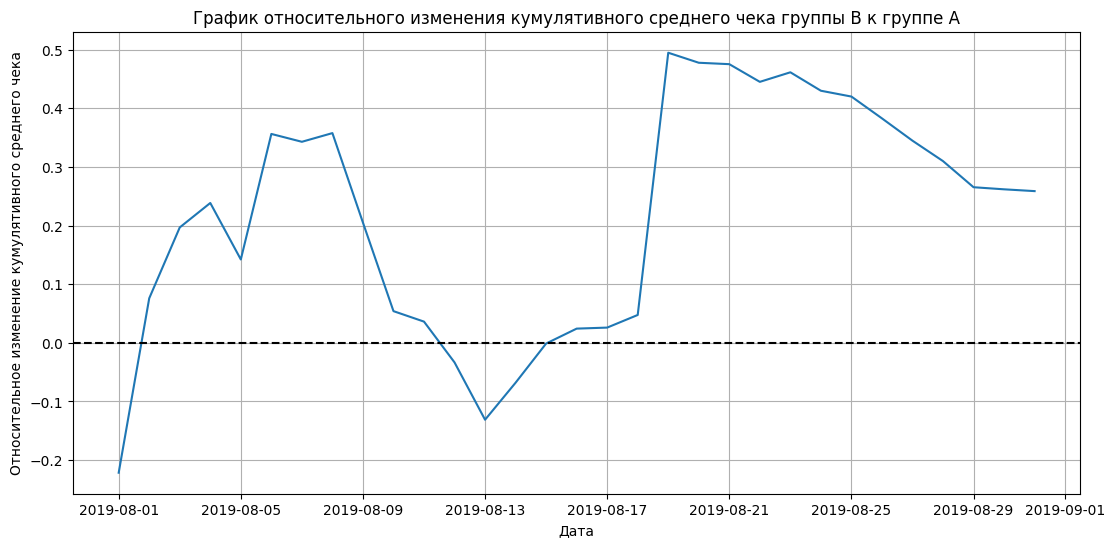

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# cтроим отношение средних чеков
plt.figure(figsize=(13,6))
(
    plt.plot(mergedCumulativeRevenue['date'], 
            (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
            (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.grid(); 

В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы и выбросы! Найдём их позже.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

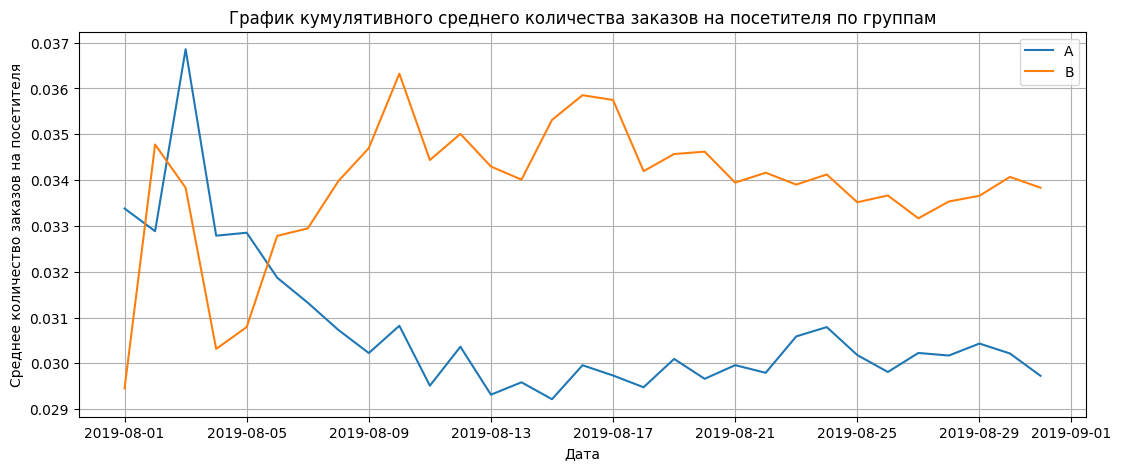

In [16]:
# получаем датафреймы с кумулятивными количествами заказов и посетителей по дням в группах А и В
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

# строим график среднего количества заказов на посетителя групп А и В
plt.figure(figsize=(13,5))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.grid()
plt.legend();

Видим, что в целом среднее количество заказов на посетителя в группах выровнялись со второй недели теста.
В самом начале теста среднее количество заказов в группе А было выше (03.08.2019), далее резкое падение и стабилизация до конца теста. 
В группе В с начала теста был взлет потом падение 04.08.2019, далее подъм и стабилизация, не смотря на колебания на всем промежутке теста. Начиная с 06.08.2019 среднее количество заказов на посетителя в группе В и до конца теста выше, чем в группе А. 

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

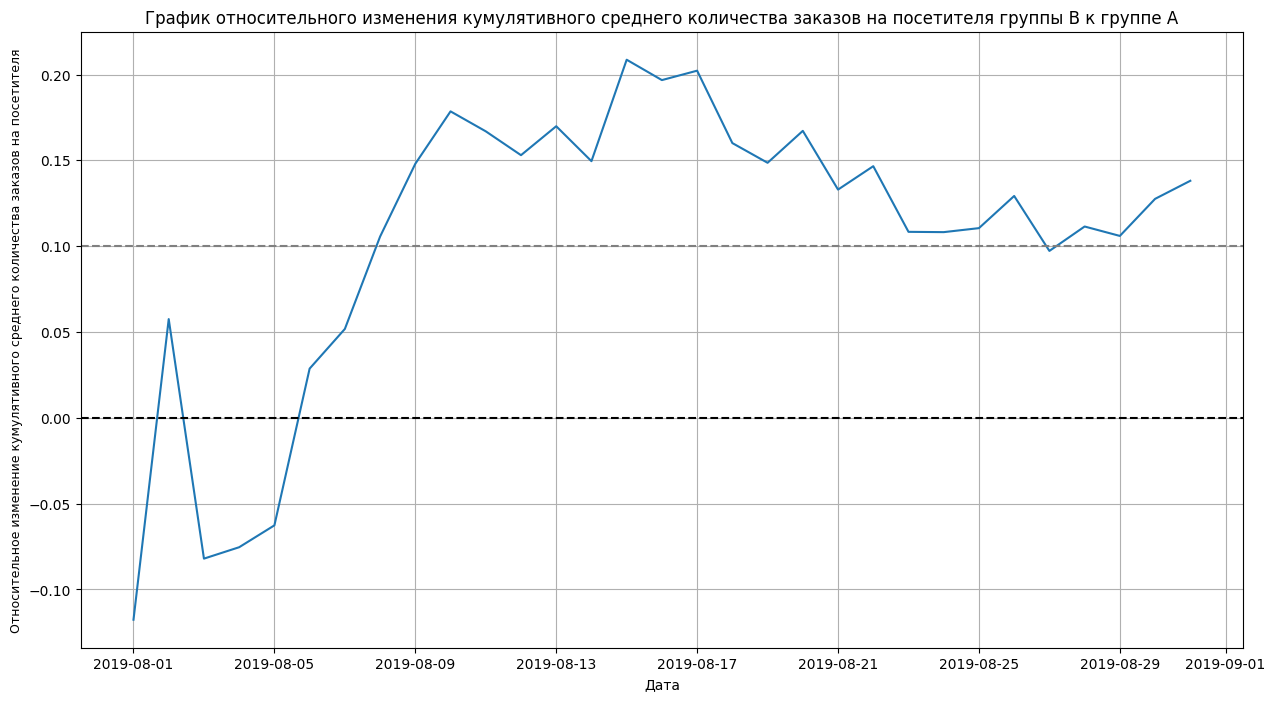

In [17]:
# собираем данные в одном датафрейме
mergeCumulativeOrders = (
    cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# cтроим отношение среднего количества заказов на посетителя
plt.figure(figsize=(15,8))
(
    plt.plot(mergeCumulativeOrders['date'], 
            (mergeCumulativeOrders['ordersB']/mergeCumulativeOrders['visitorsB'])/
            (mergeCumulativeOrders['ordersA']/mergeCumulativeOrders['visitorsA'])-1)
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя', fontsize=9)
plt.xlabel('Дата')
plt.grid(); 

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд со второй недели и до конца теста. Прирост среднего количества заказов на посетителя группы B к группе A колеблется на этом промежутке, 15-20% со второй недели и 10-13 с третьей недели и до конца теста.

### Постром точечный график количества заказов по пользователям. 

In [18]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [19]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
# присваиваем столбцам понятные названия
ordersByUsers.columns = ['userId', 'orders']

# выведем на экран по убыванию количества заказов
ordersByUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


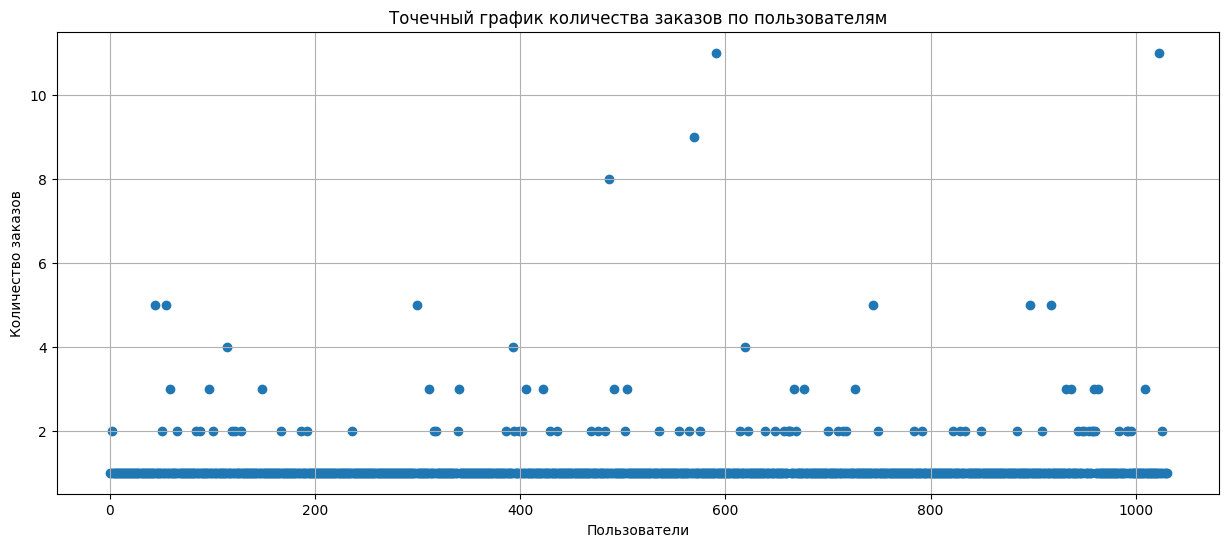

In [20]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.grid();

Из графика видно, что большинство пользователей заказывают 1 заказ, но есть и те, которые заказывают от 2 до 5.
<br>Построим гистрограмму распределения количества заказов на одного пользователя.

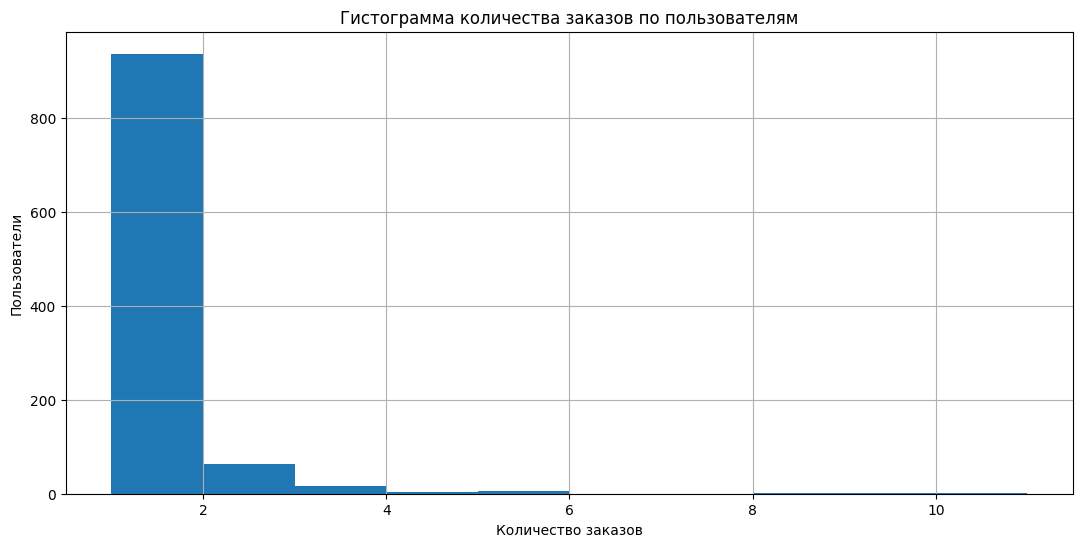

In [21]:
plt.figure(figsize=(13,6))
plt.hist(ordersByUsers['orders'])
plt.title("Гистограмма количества заказов по пользователям")
plt.ylabel('Пользователи')
plt.xlabel('Количество заказов')
plt.grid();

Так и есть, львиная доля заказывает 1 раз, 2-3 раза уже доля пользователей минимальна, остальных можно не брать в расчет.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [22]:
print('Количество заказов у 5% пользователей составляет:', np.percentile(ordersByUsers['orders'], 95))
print('Количество заказов у 1% пользователей составляет:', np.percentile(ordersByUsers['orders'], 99))

Количество заказов у 5% пользователей составляет: 2.0
Количество заказов у 1% пользователей составляет: 4.0


2 заказа оформляют 5% пользователей и только 1% больше 4-х. Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней.  

### Построим точечный график стоимостей заказов. 

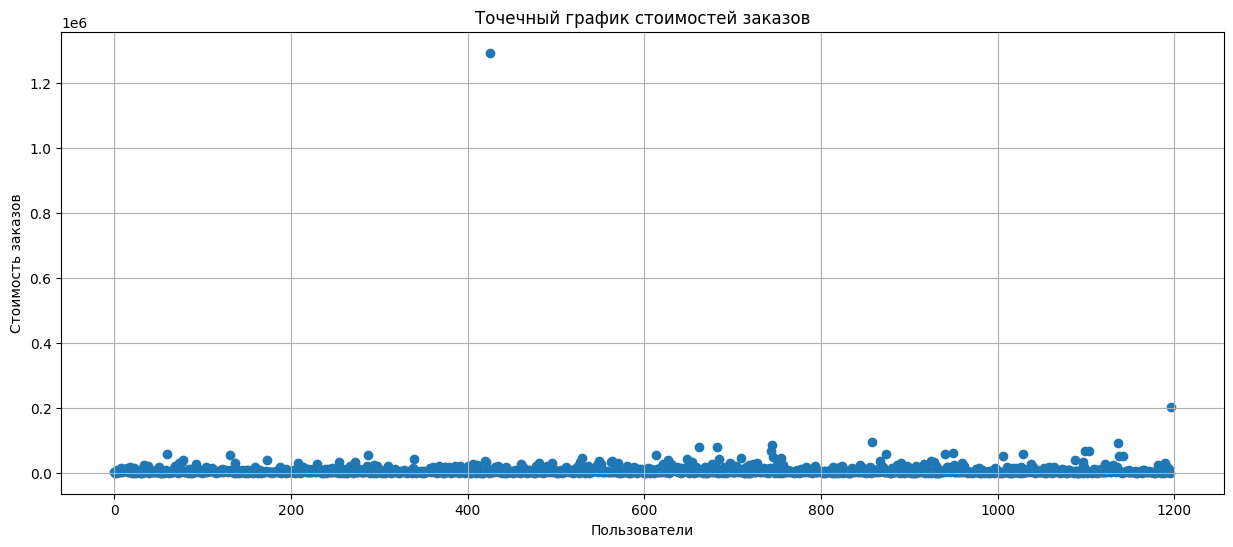

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15,6))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователи')
plt.grid();

Присутствуют 2 аномальных заказа на 1,2 млн. руб. и на 200 тыс.руб., остальные заказы не превышают 100 тыс.руб. Уберем эти выбросы и построим более наглядный график, ограничившись заказами до 100 тыс.руб.

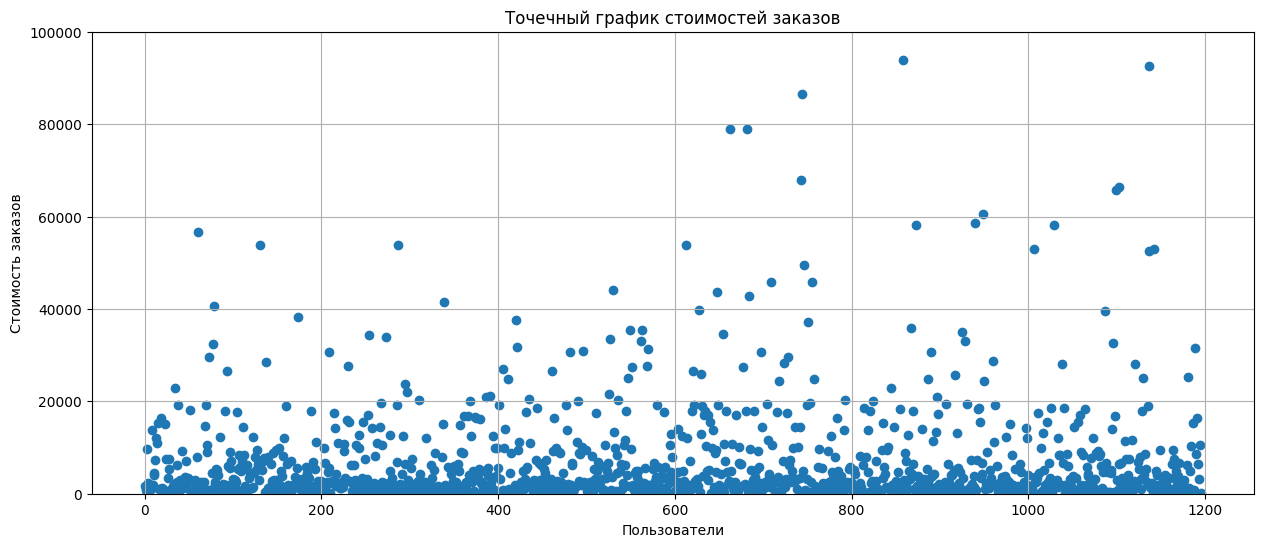

In [24]:
plt.figure(figsize=(15,6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title("Точечный график стоимостей заказов")
plt.ylabel('Стоимость заказов')
plt.xlabel('Пользователи')
plt.grid();

Большинство заказов сосредоточено до 30 тыс.руб.

### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [25]:
print('Стоимость заказов у 5% пользователей составляет:', np.percentile(orders['revenue'], 95))
print('Стоимость заказов у 1% пользователей составляет:', np.percentile(orders['revenue'], 99))

Стоимость заказов у 5% пользователей составляет: 28000.000000000004
Стоимость заказов у 1% пользователей составляет: 58233.19999999999


Стоимость заказов у 5% пользователей не превышает 28000 руб, и только 1% больше 58233,20 руб.  Выберем 28000 руб. за нижнюю границу стоимости заказов, и отсеим аномальных пользователей по ней.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя  между группам по «сырым» данным — без удаления аномальных пользователей.
<br>__Сформулируем гипотезы.__ 
<br>***Нулевая***: различий в среднем количестве заказов на посетителя между группами нет. 
<br>***Альтернативная***: различия в среднем количестве заказов на посетителя между группами есть.

In [26]:
# создадим несколько таблиц данных по заказам и визитам по группам, и добавим кумулятивные показатели
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим все таблицы в одну
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# выведем на экран
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Где,
<br>`date` — дата;
<br>`ordersPerDateA` — количество заказов в выбранную дату в группе A;
<br>`revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
<br>`ordersPerDateB` — количество заказов в выбранную дату в группе B;
<br>`revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
<br>`ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
<br>`revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
<br>`ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
<br>`revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
<br>`visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
<br>`visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
<br>`visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
<br>`visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [27]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
А также выведем относительный прирост среднего числа заказов группы B.

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(
            0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(
            0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)


# зададим критический уровень статистической значимости
alpha = .05

results = stats.mannwhitneyu(sampleA, sampleB)

print('p-value: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: по «сырым» данным различия в среднем количестве заказов на посетителя между группами есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: по «сырым» данным различий в среднем количестве заказов между группами нет.')
    
print("Относительный прирост группы B: {0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))  

p-value: 0.017
Отвергаем нулевую гипотезу: по «сырым» данным различия в среднем количестве заказов на посетителя между группами есть.
Относительный прирост группы B: 13.81%


P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем. Относительный прирост группы B равен 13.81%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
<br>***Нулевая гипотеза***: различий в среднем чеке между группами нет. 
<br>***Альтернативная гипотеза***: различия в среднем чеке между группами есть. 
<br><br>Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [29]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-value: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: по «сырым» данным различия в среднем чеке между группами есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: по «сырым» данным различий в среднем чеке между группами нет.')
    
print("Относительный прирост группы B: {0:.2%}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу: по «сырым» данным различий в среднем чеке между группами нет.
Относительный прирост группы B: 25.87%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A, прирост почти 26%. Скорее всего сказываются ранее выявленные большие заказы.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 руб. — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 
Узнаем, сколько всего аномальных пользователей атрибутом `shape`.

In [30]:
# запишем нижние границы для аномальных заказов пользователей и стоимости заказов в переменные
border_orders = np.percentile(ordersByUsers['orders'], 95)
border_revenue = np.percentile(orders['revenue'], 95)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > border_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > border_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > border_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей', abnormalUsers.shape[0]) 

Количество аномальных пользователей 74


Всего 74 аномальных пользователя. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(
            0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(
            0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0) 

<br>__Сформулируем гипотезы.__ 
<br>***Нулевая***: по «очищенным» данным различий в среднем количестве заказов на посетителя между группами нет. 
<br>***Альтернативная***: по «очищенным» данным различия в среднем количестве заказов на посетителя между группами есть.
<br>Применим статистический критерий Манна-Уитни к полученным выборкам.

In [32]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: по «очищенным» данным различия в среднем количестве заказов на посетителя между группами есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: по «очищенным» данным различий в среднем количестве заказов между группами нет.')
    
print("Относительный прирост группы B: {0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Отвергаем нулевую гипотезу: по «очищенным» данным различия в среднем количестве заказов на посетителя между группами есть.
Относительный прирост группы B: 17.27%


P-value также меньше 0.05, как и в случае с «сырыми» данными. Поэтому, нулевую гипотезу о том, что статистически значимых различий по «очищенным» данным в среднем количестве заказов на посетителя между группами нет, отвергаем. Относительный прирост группы B стал еще выше 17.27%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Результаты по среднему количеству заказов практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?
<br>Сформулируем гипотезы.
<br>***Нулевая гипотеза***: по «очищенным» данным различий в среднем чеке между группами нет. 
<br>***Альтернативная гипотеза***: по «очищенным» данным различия в среднем чеке между группами есть.

In [33]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                             orders[np.logical_and(orders['group'] == 'B', 
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('p-value: {:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: по «очищенным» данным различия в среднем чеке между группами есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: по «очищенным» данным различий в среднем чеке между группами нет.')
    
print("Относительный прирост группы B: {0:.2%}".format(
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId']
                                                                     .isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId']
                                                                       .isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.738
Не получилось отвергнуть нулевую гипотезу: по «очищенным» данным различий в среднем чеке между группами нет.
Относительный прирост группы B: -1.96%


Результат тот же, что и с «сырыми» данными. P-value значительно больше 0.05. Отвергаем нулевую гипотезу. Средний чек группы B значительно выше среднего чека группы A, прирост почти 26%. Скорее всего сказываются ранее выявленные большие заказы.
А вот разница между средними чеками упала с почти 26% до почти 2% в пользу группы A. Это доказывает, что разница была связана с выбросами в «сырых» данных.

### Примем решение по результатам теста. 

__Подведем итоги по результатам теста:__
* Есть статистически значимое различие в среднем количестве заказов на посетителя между группами, как по «сырым» данным, так и по «очищенным». При этом относительный прирост группы B выше на 13-17% по отношению к группе А.
* И по «сырыми» и по «очищенным» данным нет статистически значимого различия по среднему чеку между группами. 
* График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A в среднем на 10-15%.
* График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Цель теста - увеличить выручку. На выручку влияет среднее количество заказов на посетителя. А т.к. среднее количество заказов на посетителя группы В увеличилось, соответственно выручка тоже увеличилась, несмотря на то, что средний чек не изменился.
<br>__Исходя из этих фактов, следует остановить тест, признать его успешным, победа за группой В.__ 